In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CEPI_scores.csv")
print(df.head())

         Status of Moratorium Industrial Cluster / Area          State  \
0  Moratorium has been lifted                      Agra  Uttar Pradesh   
1  Moratorium has been lifted                 Ahmedabad        Gujarat   
2  Moratorium has been lifted             Angul Talcher         Orissa   
3  Moratorium has been lifted                   Asansol    West Bengal   
4  Moratorium has been lifted                Aurangabad    Maharashtra   

   CEPI SCORE-2009  CEPI SCORE-2011  CEPI SCORE-2013  
0            76.48            88.36            68.71  
1            75.28            78.09            69.54  
2            82.09            89.74            72.86  
3            70.20            70.96            56.01  
4            77.44            83.10            68.87  


# Average CEPI Scores Over the Years

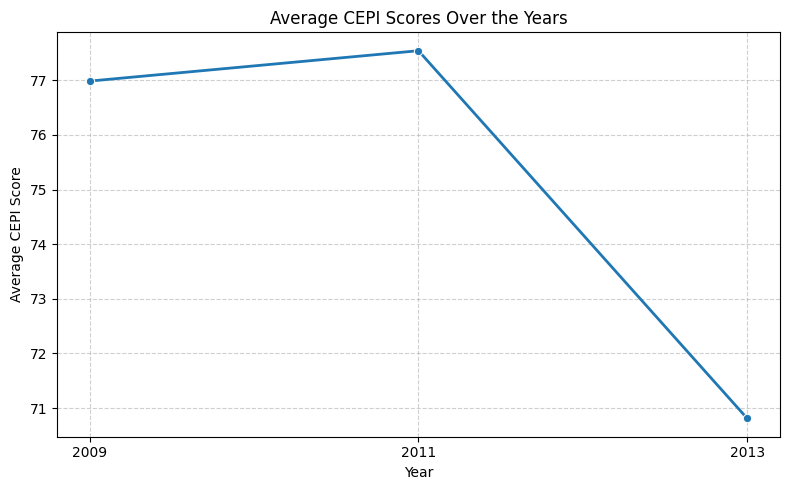

In [3]:
df_melted = df.melt(
    id_vars=["Industrial Cluster / Area"], 
    value_vars=["CEPI SCORE-2009", "CEPI SCORE-2011", "CEPI SCORE-2013"],
    var_name="Year", 
    value_name="CEPI Score"
)
df_melted["Year"] = df_melted["Year"].str.extract(r'(\d{4})')
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_melted, x="Year", y="CEPI Score", estimator='mean', errorbar=None, marker='o', linewidth=2)
plt.title("Average CEPI Scores Over the Years")
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Average CEPI Score")
plt.tight_layout()
plt.show()



# Side-by-Side Comparison of Top 5 and Bottom 5 Polluted Clusters for each year

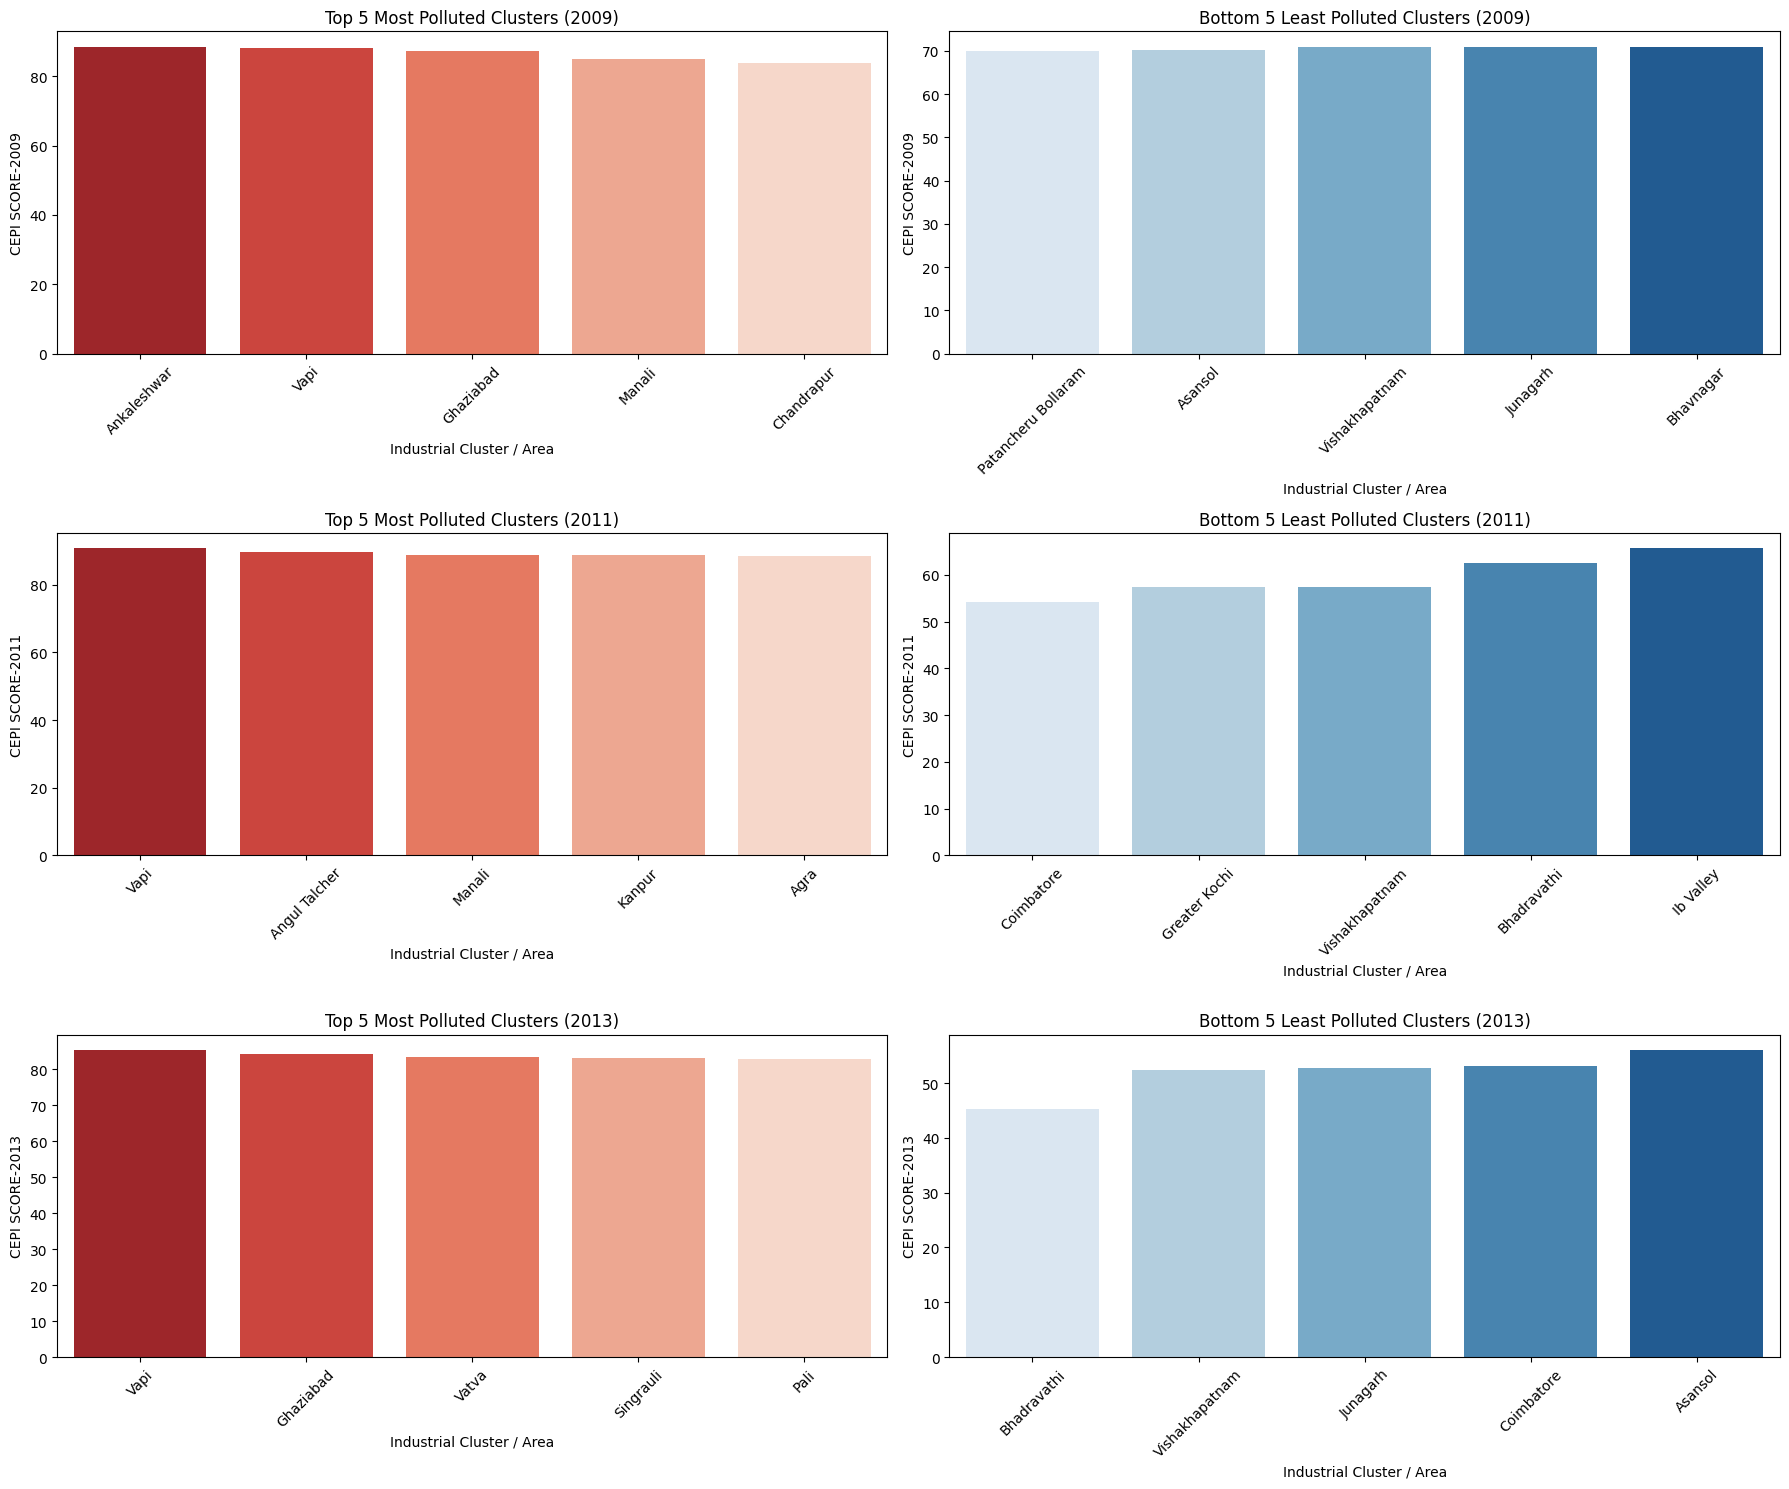

In [4]:
top_5_2009 = df.sort_values("CEPI SCORE-2009", ascending=False).head(5)
bottom_5_2009 = df.sort_values("CEPI SCORE-2009", ascending=True).head(5)

top_5_2011 = df.sort_values("CEPI SCORE-2011", ascending=False).head(5)
bottom_5_2011 = df.sort_values("CEPI SCORE-2011", ascending=True).head(5)

top_5_2013 = df.sort_values("CEPI SCORE-2013", ascending=False).head(5)
bottom_5_2013 = df.sort_values("CEPI SCORE-2013", ascending=True).head(5)
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# for 2009
sns.barplot(data=top_5_2009, x="Industrial Cluster / Area", y="CEPI SCORE-2009", 
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Top 5 Most Polluted Clusters (2009)")
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2009, x="Industrial Cluster / Area", y="CEPI SCORE-2009", 
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Bottom 5 Least Polluted Clusters (2009)")
axes[0, 1].tick_params(axis='x', rotation=45)

# for 2011
sns.barplot(data=top_5_2011, x="Industrial Cluster / Area", y="CEPI SCORE-2011", 
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Top 5 Most Polluted Clusters (2011)")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2011, x="Industrial Cluster / Area", y="CEPI SCORE-2011", 
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Bottom 5 Least Polluted Clusters (2011)")
axes[1, 1].tick_params(axis='x', rotation=45)

# for 2013
sns.barplot(data=top_5_2013, x="Industrial Cluster / Area", y="CEPI SCORE-2013", 
            hue="Industrial Cluster / Area", palette="Reds_r", legend=False, ax=axes[2, 0])
axes[2, 0].set_title("Top 5 Most Polluted Clusters (2013)")
axes[2, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=bottom_5_2013, x="Industrial Cluster / Area", y="CEPI SCORE-2013", 
            hue="Industrial Cluster / Area", palette="Blues", legend=False, ax=axes[2, 1])
axes[2, 1].set_title("Bottom 5 Least Polluted Clusters (2013)")
axes[2, 1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


# CEPI Score (2013) by Moratorium Status

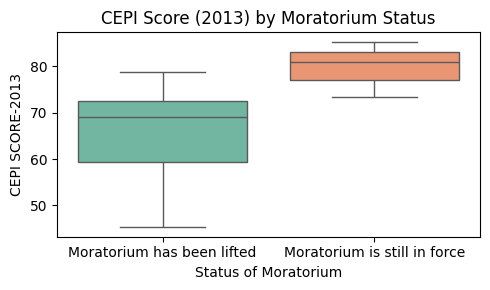

In [5]:
plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x="Status of Moratorium", y="CEPI SCORE-2013", hue="Status of Moratorium", palette="Set2", legend=False)
plt.title("CEPI Score (2013) by Moratorium Status")
plt.tight_layout()
plt.show()


# Average CEPI Score by State (2013)

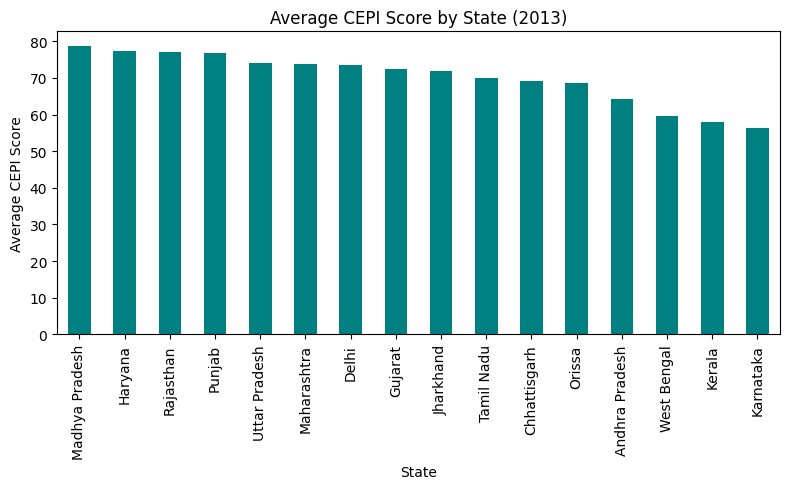

In [6]:
statewise_avg = df.groupby("State")["CEPI SCORE-2013"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
statewise_avg.plot(kind='bar', color='teal')
plt.title("Average CEPI Score by State (2013)")
plt.ylabel("Average CEPI Score")
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()


# Improved Clusters and Worsened Clusters

In [7]:
df["Trend"] = df["CEPI SCORE-2013"] - df["CEPI SCORE-2009"]
improved = df[df["Trend"] < 0].sort_values("Trend").head(5)
worsened = df[df["Trend"] > 0].sort_values("Trend", ascending=False).head(5)

print("Top 5 Improved Clusters:")
print(improved[["Industrial Cluster / Area", "Trend"]])

print("\nTop 5 Worsened Clusters:")
print(worsened[["Industrial Cluster / Area", "Trend"]])


Top 5 Improved Clusters:
   Industrial Cluster / Area  Trend
5                Bhadravathi -27.06
14                    Haldia -21.90
8                 Coimbatore -19.24
27            Vishakhapatnam -18.51
17                  Junagarh -18.07

Top 5 Worsened Clusters:
   Industrial Cluster / Area  Trend
37                   Panipat   9.36
36                      Pali   8.98
41                     Vatva   8.67
31                    Indore   7.49
38       Patancheru Bollaram   5.98


# Side-by-Side Comparison of CEPI Score Distributions (2009, 2011, 2013)

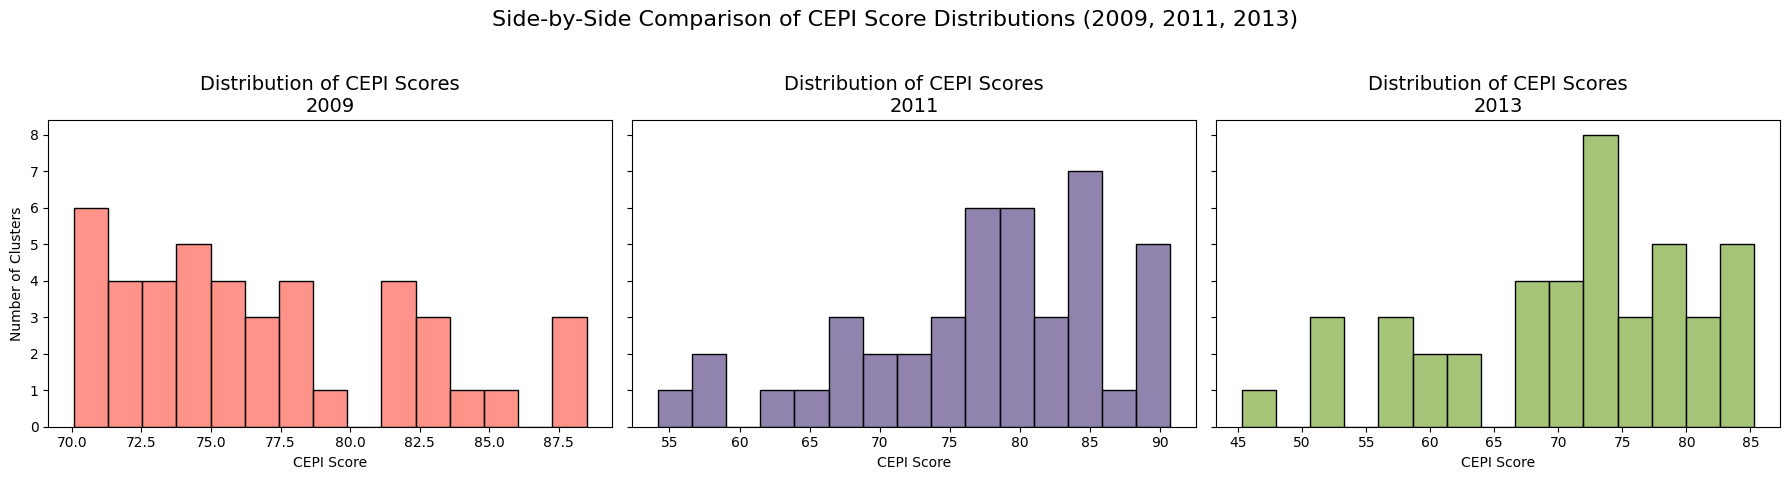

In [8]:
cepi_years = {
    "CEPI SCORE-2009": "#FF6F61",
    "CEPI SCORE-2011": "#6B5B95",
    "CEPI SCORE-2013": "#88B04B"
}
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, (col, color) in zip(axes, cepi_years.items()):
    sns.histplot(df[col], bins=15, color=color, ax=ax)
    ax.set_title(f"Distribution of CEPI Scores\n{col[-4:]}", fontsize=14)
    ax.set_xlabel("CEPI Score")
    ax.set_ylabel("Number of Clusters")

plt.suptitle("Side-by-Side Comparison of CEPI Score Distributions (2009, 2011, 2013)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Distribution of CEPI Scores (2013)

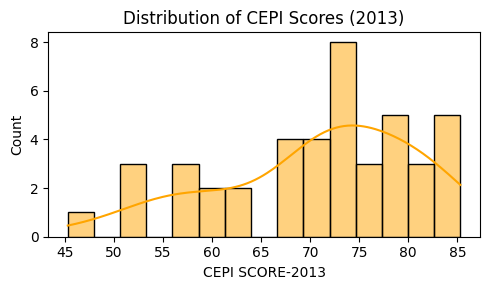

In [9]:
plt.figure(figsize=(5, 3))
sns.histplot(df["CEPI SCORE-2013"], kde=True, color='orange', bins=15)
plt.title("Distribution of CEPI Scores (2013)")
plt.tight_layout()
plt.show()


# Heatmap of CEPI Scores (2009, 2011, 2013) by Industrial Cluster

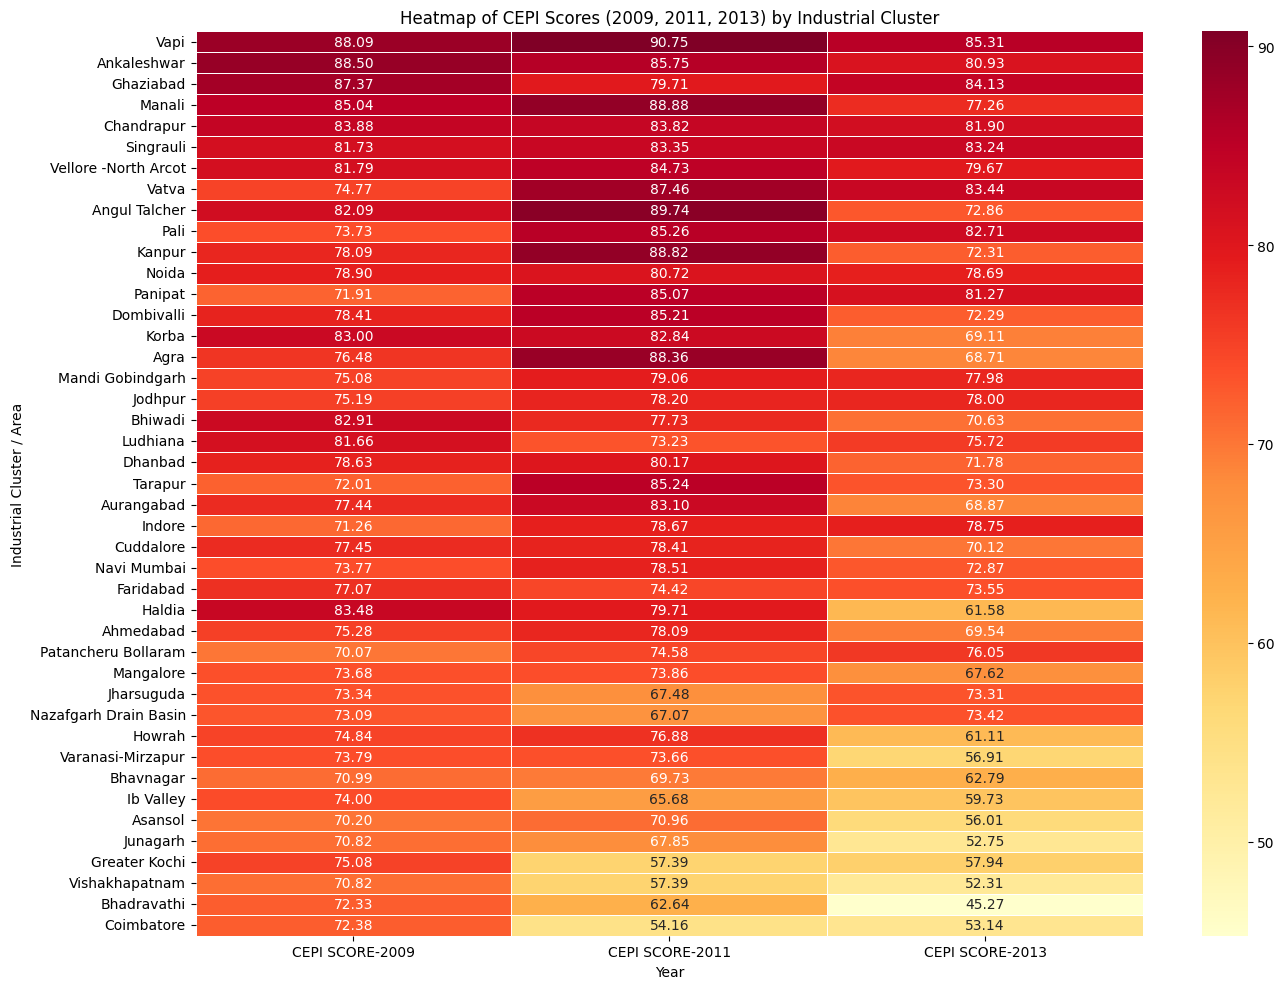

In [11]:
heat_df = df.set_index("Industrial Cluster / Area")[["CEPI SCORE-2009", "CEPI SCORE-2011", "CEPI SCORE-2013"]]
heat_df["Average"] = heat_df.mean(axis=1)
heat_df = heat_df.sort_values("Average", ascending=False).drop("Average", axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(heat_df, annot=True, cmap="YlOrRd", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of CEPI Scores (2009, 2011, 2013) by Industrial Cluster")
plt.xlabel("Year")
plt.ylabel("Industrial Cluster / Area")
plt.tight_layout()
plt.show()
